In [326]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from lime import lime_tabular
from sklearn.model_selection import train_test_split

In [337]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [324]:
encoder = OneHotEncoder()
encoder.fit(df.astype(float))
encoded_train = encoder.transform(x_train)
rf = RandomForestClassifier()
rf.fit(encoded_train, y_train)

encoded_train

ValueError: X has 279 features, but OneHotEncoder is expecting 280 features as input.

In [333]:
df = pd.read_csv("resultados_randomForest_2.csv")
df.head(5)

,strategy,k,n_estimators,max_depth,min_samples_split,min_samples_leaf,f1,elapsed_time
0,median,113,66,6,13,14,0.377357,0.619333
1,most_frequent,63,1,19,19,17,0.377357,0.124584
2,mean,93,16,19,6,12,0.377357,0.187448
3,median,148,11,5,7,9,0.395111,0.172756
4,median,13,51,10,6,5,0.377357,0.454763


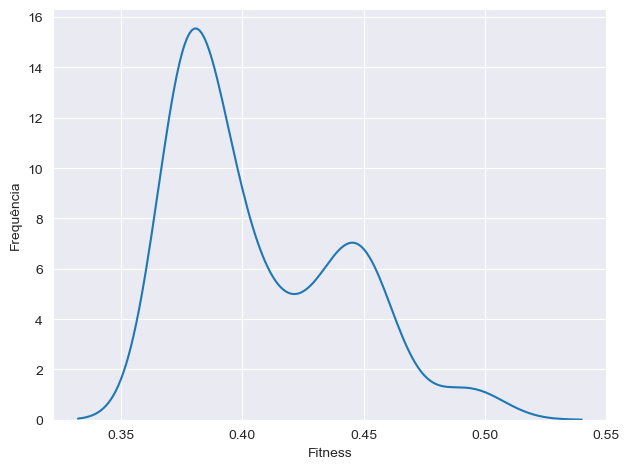

In [268]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

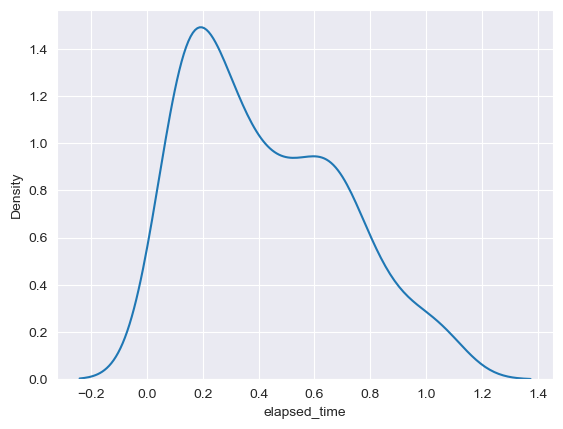

In [269]:
sns.kdeplot(df, x="elapsed_time")

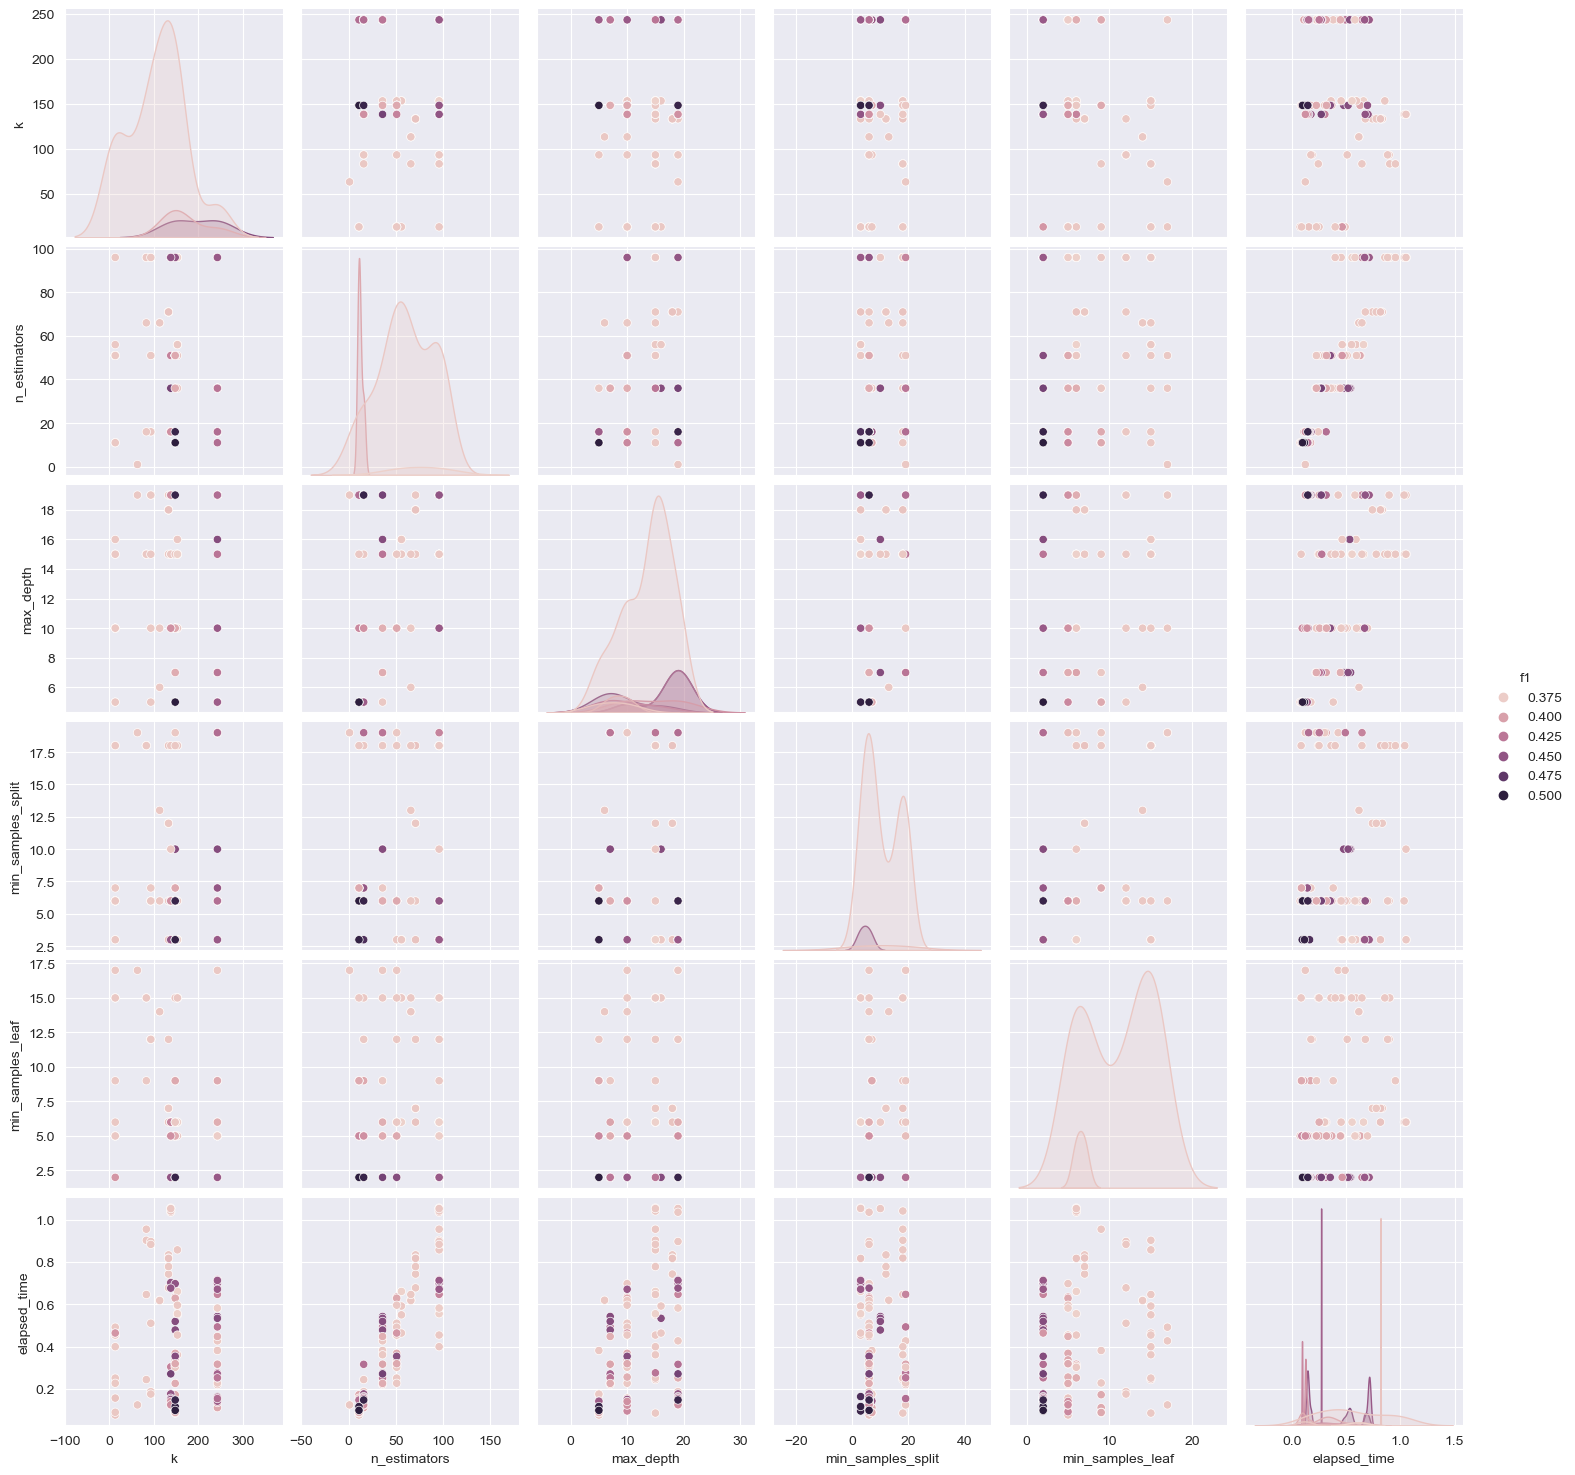

In [270]:
df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [271]:
X = df.to_numpy()[:, :-2]

X

array([['median', 113, 66, 6, 13, 14],
       ['most_frequent', 63, 1, 19, 19, 17],
       ['mean', 93, 16, 19, 6, 12],
       ['median', 148, 11, 5, 7, 9],
       ['median', 13, 51, 10, 6, 5],
       ['median', 138, 96, 15, 3, 6],
       ['mean', 153, 56, 16, 3, 15],
       ['most_frequent', 243, 36, 7, 10, 2],
       ['most_frequent', 133, 71, 18, 12, 7],
       ['most_frequent', 83, 96, 15, 18, 15],
       ['median', 148, 51, 10, 6, 5],
       ['mean', 153, 56, 15, 3, 6],
       ['most_frequent', 133, 71, 18, 18, 7],
       ['mean', 93, 51, 10, 6, 12],
       ['median', 13, 51, 15, 3, 6],
       ['most_frequent', 243, 16, 19, 6, 2],
       ['mean', 93, 96, 19, 6, 12],
       ['median', 138, 96, 19, 3, 6],
       ['median', 133, 71, 18, 12, 7],
       ['median', 138, 96, 19, 6, 6],
       ['mean', 133, 71, 19, 6, 12],
       ['most_frequent', 133, 71, 15, 12, 7],
       ['median', 13, 51, 10, 6, 5],
       ['most_frequent', 243, 36, 19, 19, 17],
       ['most_frequent', 13, 51, 10, 6

In [272]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [273]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded

array([[ -4.225571  ,  -5.397035  ],
       [  8.126534  ,  -1.1957681 ],
       [ -2.9567535 ,   4.972162  ],
       [ -8.24833   ,  -6.836033  ],
       [ -9.143378  ,  -0.31755736],
       [  0.2185704 ,  -7.3509264 ],
       [  4.609345  ,  -9.334064  ],
       [  7.1614614 ,   3.4742763 ],
       [ -3.4957216 , -11.933972  ],
       [  1.4930904 , -12.943943  ],
       [ -7.5056834 ,  -1.1920301 ],
       [  4.7637534 , -10.331624  ],
       [ -3.8791618 , -12.116633  ],
       [ -4.9549136 ,   4.176935  ],
       [  0.1323006 ,  -9.063904  ],
       [  3.4128082 ,   0.17606792],
       [ -3.4414542 ,   4.636273  ],
       [  0.47138944,  -6.070667  ],
       [ -3.4630136 , -11.206496  ],
       [ -0.03613382,  -5.236753  ],
       [ -2.509415  ,   4.2002554 ],
       [ -3.1056564 , -12.328584  ],
       [ -9.438856  ,  -1.0901009 ],
       [  7.869053  ,  -0.3489387 ],
       [ -9.894087  ,   1.1498272 ],
       [ -7.4282217 ,  -8.5941725 ],
       [  0.97474384, -13.270999  ],
 

In [274]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))

x_embedded_f1

array([[ -4.22557116,  -5.39703512,   0.37735719],
       [  8.12653446,  -1.19576812,   0.37735719],
       [ -2.95675349,   4.97216177,   0.37735719],
       [ -8.24833012,  -6.83603287,   0.39511145],
       [ -9.14337826,  -0.31755736,   0.37735719],
       [  0.2185704 ,  -7.3509264 ,   0.37735719],
       [  4.60934496,  -9.33406353,   0.37735719],
       [  7.16146135,   3.4742763 ,   0.45609742],
       [ -3.49572158, -11.93397236,   0.37735719],
       [  1.49309039, -12.94394302,   0.37735719],
       [ -7.50568342,  -1.19203007,   0.39526213],
       [  4.76375341, -10.33162403,   0.37206618],
       [ -3.87916183, -12.11663342,   0.38029663],
       [ -4.95491362,   4.1769352 ,   0.37735719],
       [  0.1323006 ,  -9.06390381,   0.37735719],
       [  3.41280818,   0.17606792,   0.43089378],
       [ -3.44145417,   4.63627291,   0.37735719],
       [  0.47138944,  -6.07066679,   0.37735719],
       [ -3.46301365, -11.20649624,   0.37735719],
       [ -0.03613382,  -5.23675

In [339]:
# Usei esse site como exemplo: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

explainer = LimeTabularExplainer(x_embedded_f1 ,class_names=['a', 'b'], kernel_width=3, verbose=False)

i = np.random.randint(0, x_test.shape[0])
exp = explainer.explain_instance(x_test[i], rf.predict_proba, num_features=2, top_labels=1)

exp.show_in_notebook(show_table=True, show_all=False)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

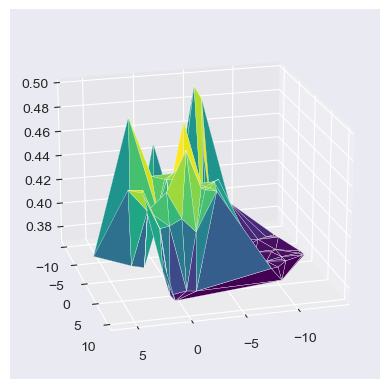

In [275]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

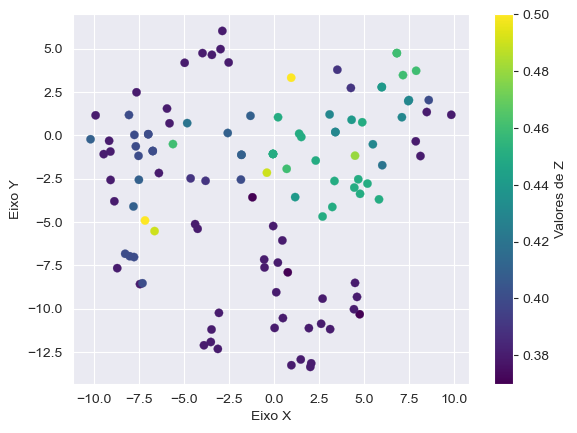

In [276]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()